In [1]:
import pandas as pd

# 데이터 불러오기 
data_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속년별 단속현황.csv'  
data = pd.read_csv(data_path, encoding='utf-8-sig')

# 데이터 확인
data.head()

<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\esroh\AppData\Local\Temp\ipykernel_2160\2478573476.py:4: SyntaxWarning: invalid escape sequence '\G'
  data_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속년별 단속현황.csv'  # 데이터 파일 경로


,시군구명,과태료명,단속년도,단속건수,단속원금
0,종로구,주정차위반과태료,2021,"136,571","6,216,050,000"
1,종로구,버스전용차로위반과태료,2021,1,"50,000"
2,중구,주정차위반과태료,2021,"128,028","5,460,510,000"
3,용산구,주정차위반과태료,2021,"60,423","2,726,335,000"
4,용산구,버스전용차로위반과태료,2021,5,"260,000"


In [2]:
# 숫자 데이터 정리
data['단속건수'] = data['단속건수'].str.replace(',', '').astype(int)

# 컬럼 이름 변경
data.rename(columns={
    '시군구명': '자치구',
    '과태료명': '단속유형',
    '단속건수': '단속 건수',
}, inplace=True)

data.head()

,자치구,단속유형,단속년도,단속 건수,단속원금
0,종로구,주정차위반과태료,2021,136571,"6,216,050,000"
1,종로구,버스전용차로위반과태료,2021,1,"50,000"
2,중구,주정차위반과태료,2021,128028,"5,460,510,000"
3,용산구,주정차위반과태료,2021,60423,"2,726,335,000"
4,용산구,버스전용차로위반과태료,2021,5,"260,000"


In [3]:
# 단속유형이 '주정차위반과태료'인 데이터만 필터링
parking_violation_data = data[data['단속유형'] == '주정차위반과태료'][['자치구', '단속 건수']]

parking_violation_data.head()

,자치구,단속 건수
0,종로구,136571
2,중구,128028
3,용산구,60423
5,성동구,53650
6,광진구,49020


In [4]:
# 인덱스 초기화
parking_violation_data.reset_index(drop=True, inplace=True)

parking_violation_data.head()

,자치구,단속 건수
0,종로구,136571
1,중구,128028
2,용산구,60423
3,성동구,53650
4,광진구,49020


In [5]:
save_path = r'C:\GitHub_Project\Parker_AI-ML\data\자치구별_주정차위반_단속건수.csv'

# CSV 파일로 저장
parking_violation_data.to_csv(save_path, index=False, encoding='utf-8-sig')

### 데이터 시각화

자치구별 주정차 위반 단속 건수 순위표:
    순위   자치구   단속 건수
0    1   강남구  156069
1    2   강서구  151696
2    3   종로구  136571
3    4    중구  128028
4    5   서초구  115853
5    6   송파구  107497
6    7  영등포구   88293
7    8   마포구   84072
8    9   관악구   74795
9   10  동대문구   68531
10  11   양천구   60737
11  12   은평구   60609
12  13   용산구   60423
13  14   성동구   53650
14  15   구로구   53519
15  16   광진구   49020
16  17   노원구   46695
17  18   금천구   44701
18  19   동작구   44390
19  20   강북구   44180
20  21   도봉구   41735
21  22   강동구   36743
22  23  서대문구   35297
23  24   성북구   34709
24  25   중랑구   31634


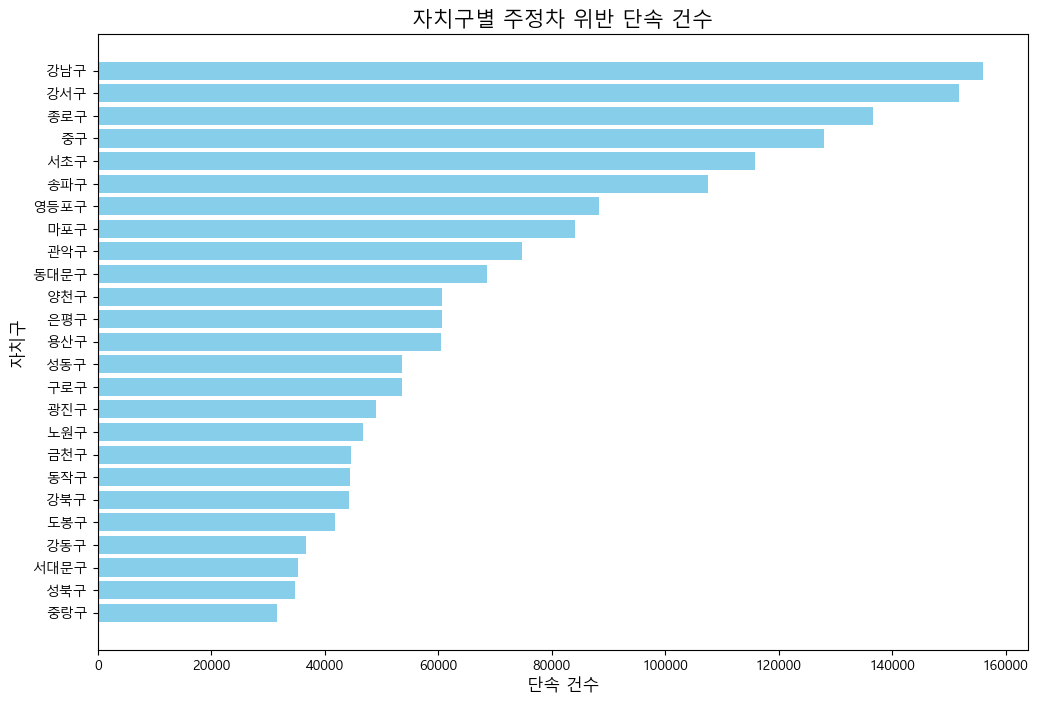

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비: 단속 건수 내림차순 정렬
sorted_data = parking_violation_data.sort_values(by='단속 건수', ascending=False).reset_index(drop=True)

# 순위 표시
sorted_data['순위'] = sorted_data.index + 1

# 순위를 첫 번째 칼럼으로 이동
sorted_data = sorted_data[['순위', '자치구', '단속 건수']]

# 순위표 출력
print("자치구별 주정차 위반 단속 건수 순위표:")
print(sorted_data)
save_path = r'C:\GitHub_Project\Parker_AI-ML\data\자치구별_주정차위반_단속건수_순위표.csv'
sorted_data.to_csv(save_path, index=False, encoding='utf-8-sig')

# 시각화: 수평 막대 그래프
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['자치구'], sorted_data['단속 건수'], color='skyblue')
plt.xlabel('단속 건수', fontsize=12)
plt.ylabel('자치구', fontsize=12)
plt.title('자치구별 주정차 위반 단속 건수', fontsize=15)
plt.gca().invert_yaxis()  # 내림차순 정렬을 반영
plt.show()
